<a href="https://colab.research.google.com/github/axellebersier/Urban_data_mining/blob/main/Data_description_2000.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Data Processing**


##Data description

Set up and load the data

In [262]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
rnd_seed = 42
rnd_gen = np.random.default_rng(rnd_seed)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "dim_reduction"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [263]:
import pandas as pd

url = 'https://github.com/axellebersier/Urban_data_mining/blob/main/Data/data_2000.xlsx?raw=true'
df_2020 = pd.read_excel(url)



##Data Description 2020

In [264]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2142 entries, 0 to 2141
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                2142 non-null   int64  
 1   Population        2142 non-null   float64
 2   dependency_ratio  2142 non-null   float64
 3   p_foreigners      2142 non-null   float64
 4   p_infrastructure  2142 non-null   float64
 5   p_forested        2142 non-null   float64
 6   p_agriculture     2142 non-null   float64
 7   p_improductible   2142 non-null   float64
 8   surface_polygone  2142 non-null   float64
 9   natural_growth    2142 non-null   float64
 10  p_migration       2142 non-null   float64
 11  p_surf_transport  2142 non-null   float64
 12  density           2142 non-null   float64
 13  p_pop_19          2142 non-null   float64
 14  p_pop_65          2142 non-null   float64
dtypes: float64(14), int64(1)
memory usage: 251.1 KB


In [265]:
df_2020.describe()

,ID,Population,dependency_ratio,p_foreigners,p_infrastructure,p_forested,p_agriculture,p_improductible,surface_polygone,natural_growth,p_migration,p_surf_transport,density,p_pop_19,p_pop_65
count,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000,2142.000000
mean,3287.015873,3020.516706,66.971343,11.467692,0.136807,0.324231,0.472321,0.066550,1848.058632,2.842066,2.186966,4.020413,364.321516,25.327932,14.507807
std,2134.111655,10604.251549,11.017047,8.650242,0.139884,0.159759,0.190833,0.141474,3352.808145,7.133909,22.887662,3.645178,680.983980,3.866941,4.196830
min,1.000000,26.000000,37.452949,0.000000,0.001215,0.000000,0.000000,0.000000,31.000000,-93.023256,-184.615385,0.000000,0.910000,3.448276,2.500000
25%,1066.250000,556.250000,59.754339,4.932746,0.052528,0.205426,0.346983,0.003155,441.250000,0.000000,-9.345794,1.818541,67.955000,22.930240,11.687195
50%,3294.500000,1207.000000,65.870576,9.014563,0.089034,0.310109,0.489456,0.010811,831.000000,3.153154,1.035237,2.955761,151.820000,25.418718,14.143485
75%,5411.750000,2811.750000,73.313070,16.075314,0.172951,0.426732,0.620431,0.045745,1679.250000,6.469608,12.844392,4.959120,378.790000,27.852255,16.772445
max,6810.000000,337900.000000,133.682875,51.663942,0.966102,0.902913,0.916667,0.950813,43861.000000,44.444444,197.222222,38.901602,11171.630000,39.240506,50.000000


In [266]:
w_pop = df_2020.iloc[:, 1].tolist()  # the column of the population

w_surf = df_2020.iloc[:, 8].tolist() # the column of the surface

In [267]:
print(df_2020.columns)
#df_2020.drop('Population', axis=1, inplace=True)
#df_2020.drop('surface_polygone', axis=1, inplace=True)

Index(['ID', 'Population', 'dependency_ratio', 'p_foreigners',
       'p_infrastructure', 'p_forested', 'p_agriculture', 'p_improductible',
       'surface_polygone', 'natural_growth', 'p_migration', 'p_surf_transport',
       'density', 'p_pop_19', 'p_pop_65'],
      dtype='object')


In [268]:
df_2020.head()

,ID,Population,dependency_ratio,p_foreigners,p_infrastructure,p_forested,p_agriculture,p_improductible,surface_polygone,natural_growth,p_migration,p_surf_transport,density,p_pop_19,p_pop_65
0,1,1517.0,52.720079,5.735003,0.113780,0.310999,0.520860,0.053097,791.0,5.273566,11.881188,4.955527,195.20,24.222798,10.297927
1,2,9933.0,60.130415,25.974026,0.263456,0.284230,0.442871,0.004721,1059.0,3.724957,14.741765,6.509434,972.10,25.227846,12.323056
2,3,3896.0,48.701299,12.191992,0.135935,0.292059,0.570659,0.002692,743.0,9.240246,23.753589,5.234899,523.96,24.505523,8.245569
3,4,3038.0,61.616162,8.459513,0.113235,0.291176,0.572794,0.025735,1360.0,1.974984,-16.688482,4.459064,223.20,27.598684,10.526316
4,5,2994.0,64.250412,15.464262,0.173047,0.335375,0.485452,0.009188,653.0,5.010020,-3.680161,4.134763,458.04,28.084253,11.033099


In [269]:
df_2020 =  df_2020.iloc[:,2:]
#df_2020.drop('p_culture_institution', axis=1, inplace=True)
df_2020

,dependency_ratio,p_foreigners,p_infrastructure,p_forested,p_agriculture,p_improductible,surface_polygone,natural_growth,p_migration,p_surf_transport,density,p_pop_19,p_pop_65
0,52.720079,5.735003,0.113780,0.310999,0.520860,0.053097,791.0,5.273566,11.881188,4.955527,195.200000,24.222798,10.297927
1,60.130415,25.974026,0.263456,0.284230,0.442871,0.004721,1059.0,3.724957,14.741765,6.509434,972.100000,25.227846,12.323056
2,48.701299,12.191992,0.135935,0.292059,0.570659,0.002692,743.0,9.240246,23.753589,5.234899,523.960000,24.505523,8.245569
3,61.616162,8.459513,0.113235,0.291176,0.572794,0.025735,1360.0,1.974984,-16.688482,4.459064,223.200000,27.598684,10.526316
4,64.250412,15.464262,0.173047,0.335375,0.485452,0.009188,653.0,5.010020,-3.680161,4.134763,458.040000,28.084253,11.033099
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2137,85.285285,8.849558,0.057923,0.377049,0.561749,0.002186,915.0,7.079646,-24.475524,1.851852,67.210000,25.283630,20.745543
2138,75.329269,6.535513,0.066840,0.479601,0.442708,0.009115,2304.0,0.404300,-1.289454,2.653328,58.050000,23.736110,19.226336
2139,80.396148,3.568109,0.034170,0.527287,0.424615,0.014251,6175.0,4.264995,10.804619,1.844063,22.260000,26.861034,17.420856
2140,93.049369,3.037032,0.034938,0.399951,0.565111,0.000000,4093.0,2.806853,-6.393157,1.452202,29.256667,26.048107,21.712559


In [270]:
df_2020 = pd.DataFrame(df_2020)
corr_matrix_2020 = df_2020.corr()

In [271]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2142 entries, 0 to 2141
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dependency_ratio  2142 non-null   float64
 1   p_foreigners      2142 non-null   float64
 2   p_infrastructure  2142 non-null   float64
 3   p_forested        2142 non-null   float64
 4   p_agriculture     2142 non-null   float64
 5   p_improductible   2142 non-null   float64
 6   surface_polygone  2142 non-null   float64
 7   natural_growth    2142 non-null   float64
 8   p_migration       2142 non-null   float64
 9   p_surf_transport  2142 non-null   float64
 10  density           2142 non-null   float64
 11  p_pop_19          2142 non-null   float64
 12  p_pop_65          2142 non-null   float64
dtypes: float64(13)
memory usage: 217.7 KB


##Description of the correlations for 2020

Correlation matrix

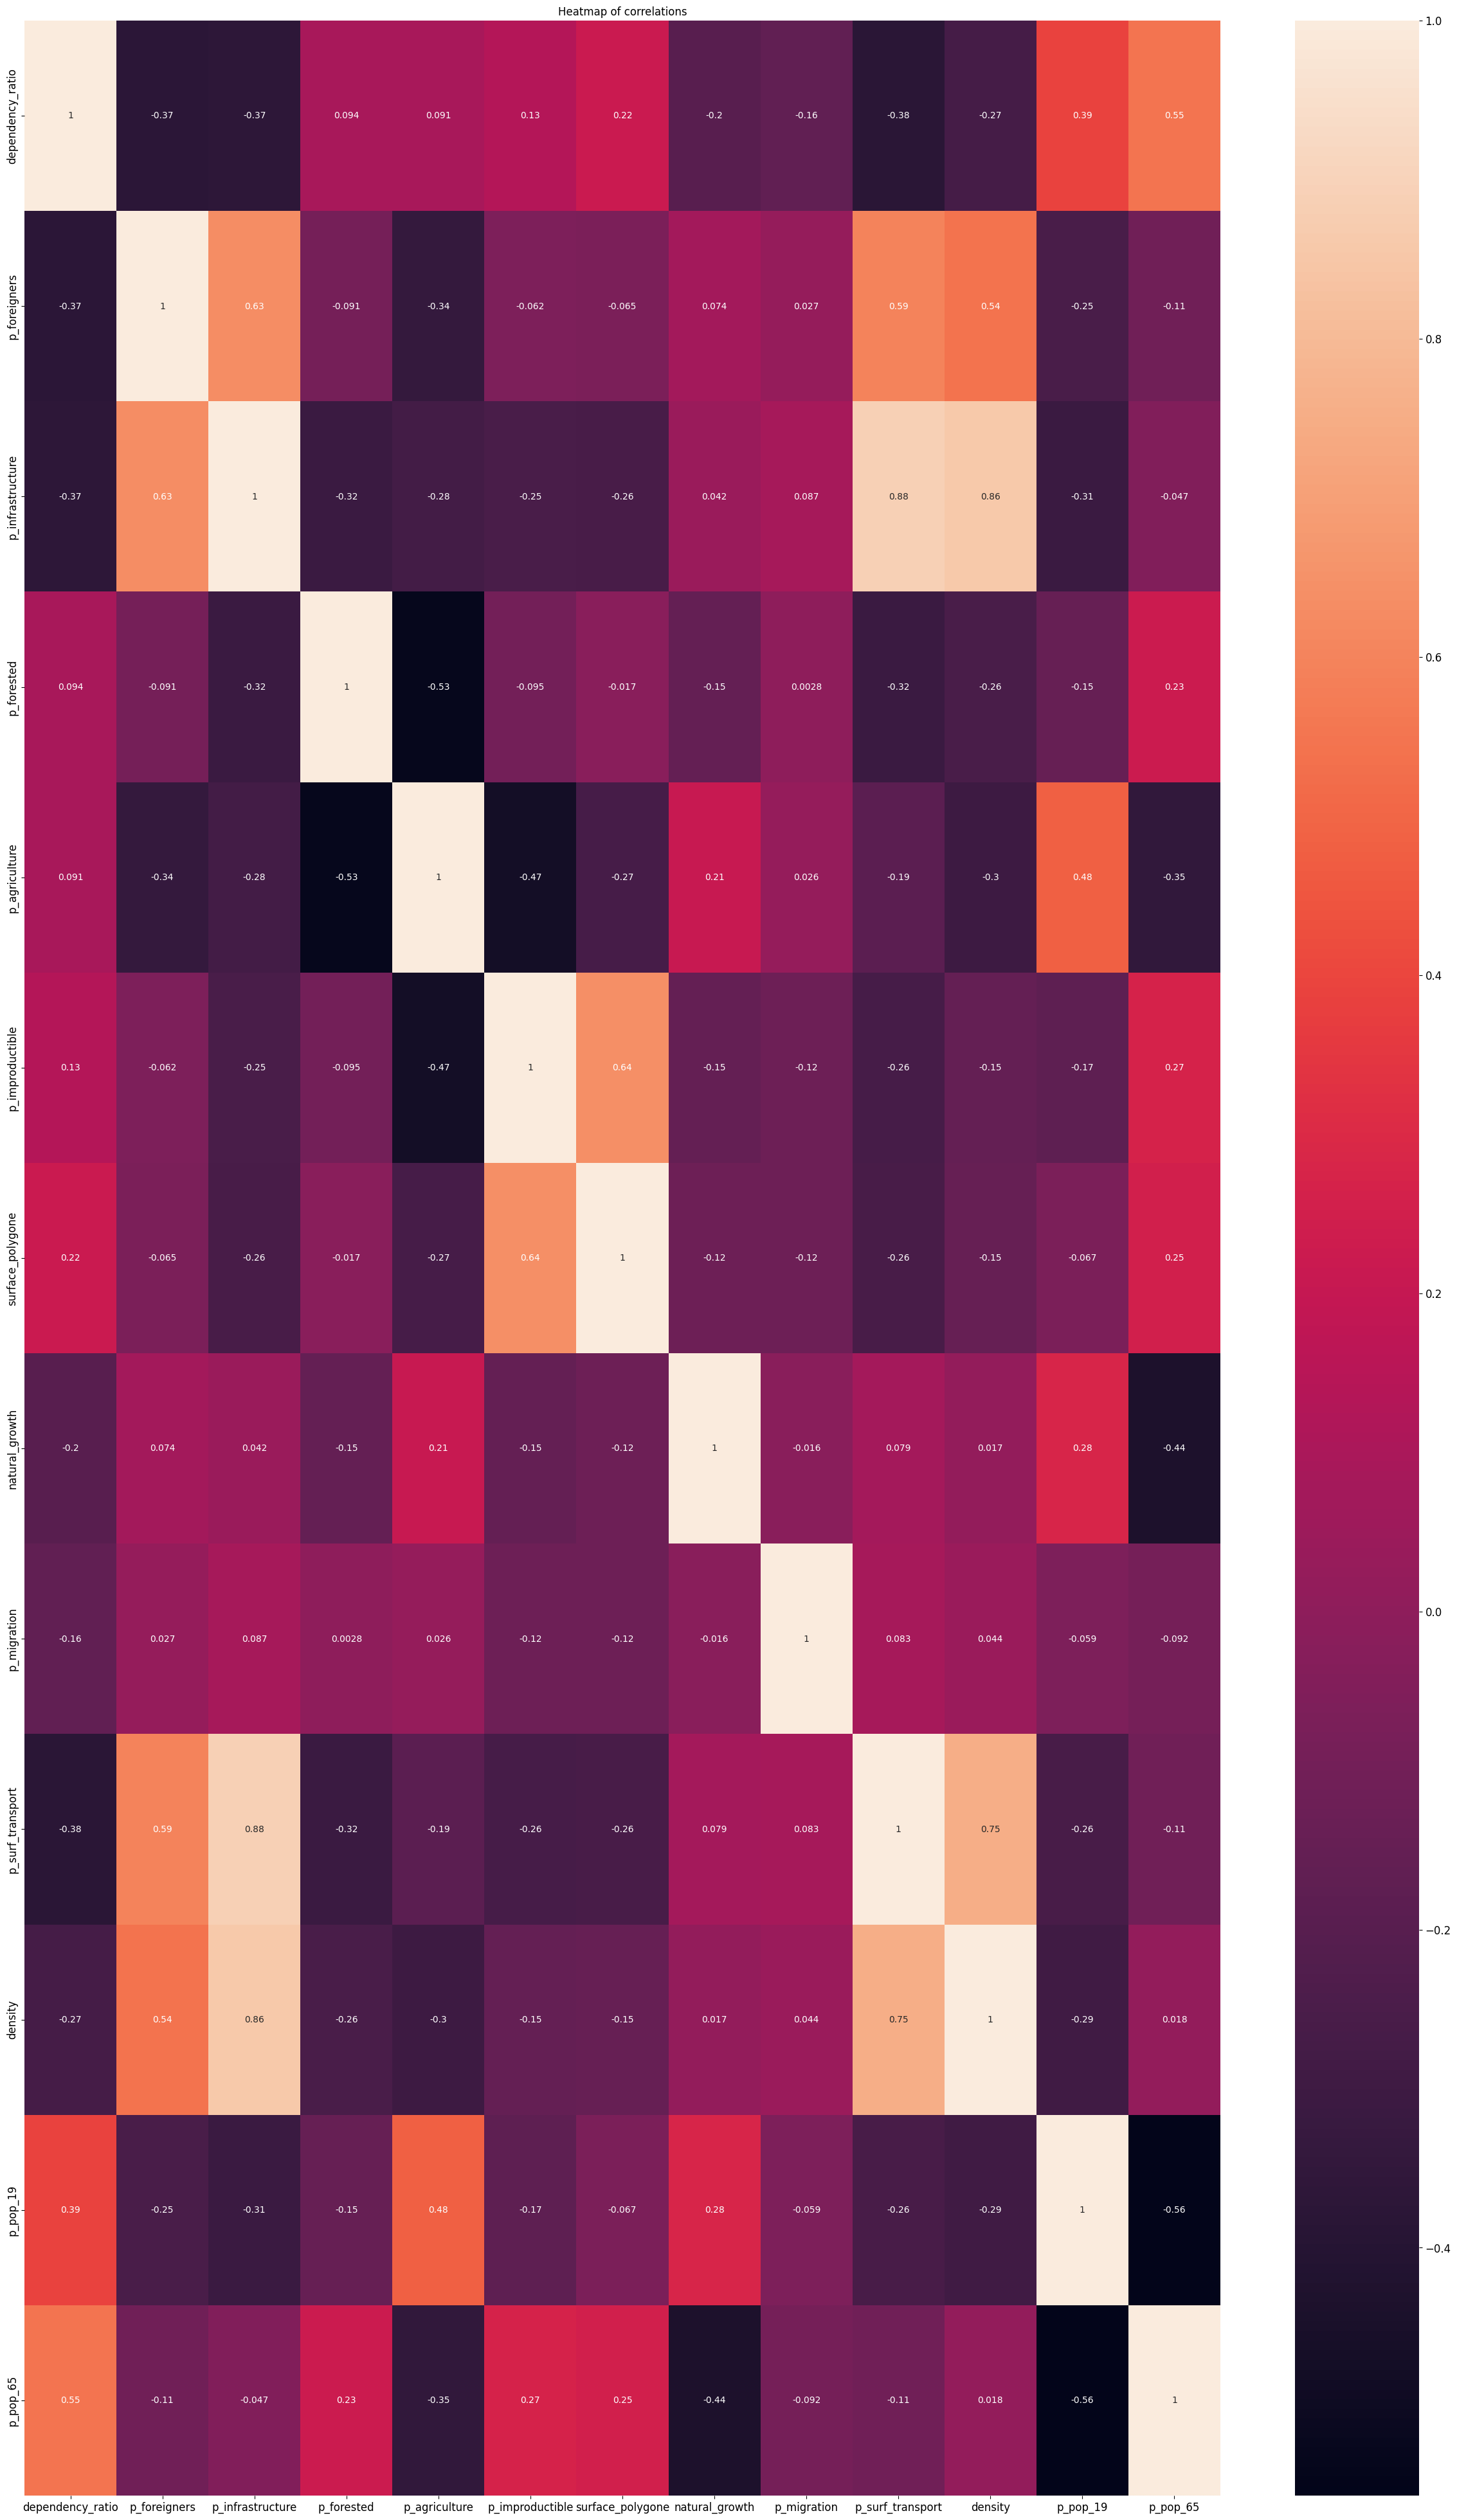

In [272]:
import seaborn as sn
import matplotlib.pyplot as plt

ax = sn.heatmap(corr_matrix_2020, annot=True)
plt.title("Heatmap of correlations")
plt.rcParams["figure.figsize"] = (30,50)
plt.show()


Principal component Analysis => cf code in R

Extract the data with the z-score 

In [273]:
df_2020.to_csv('data_scaled_2000.csv', index = False, sep=',')

##Number of clusters

delete the weights

In [274]:
df_2020.drop('Population', axis=1, inplace=True)
df_2020.drop('surface_polygone', axis=1, inplace=True)

KeyError: ignored

Silhouette score

set up to do a K-Means analysis

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

Data preprocessing and standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
nostdf_2020 = df_2020

scaler = StandardScaler()
stdf_2020 = scaler.fit_transform(df_2020)

df_2020 = pd.DataFrame(stdf_2020)
print(df_2020)

Determination of the parameters and the number of clusters

In [ ]:
from sklearn.cluster import KMeans

df_2020 = np.nan_to_num(df_2020, nan=0)

inertias = []

for i in range(1,13):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_2020)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,13), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()
plt.rcParams["figure.figsize"] = (10,10)

In [ ]:
silhouette_ann= []
for num_clusters in range(2,10):
  # initialise kmeans
  kmeans = KMeans(num_clusters)
  kmeans.fit(df_2020)
  cluster_labels = kmeans.labels_
  
# silhouette score
  silhouette_ann.append(silhouette_score(df_2020, cluster_labels))
silhouette_ann

In [ ]:
num_clusters

In [ ]:
Ncluster = range(1,num_clusters)
Ncluster
silhouette_ann

In [ ]:
plt.plot(Ncluster,silhouette_ann,marker='s',c='k',lw=2)
plt.xlabel('Number of Clusters') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette Analysis for Optimal K')
plt.show()
plt.rcParams["figure.figsize"] = (10,10)

In [ ]:
df_2020 = pd.DataFrame(df_2020)

In [ ]:
df_2020

Implement a weighted K-means


In [ ]:
df_2020_K = df_2020

1. K-means without weight

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_2020)
print(kmeans)

y_kmean_3 = kmeans.predict(df_2020)

In [ ]:
df_2020

In [ ]:
kmeans = KMeans(n_clusters=7)
kmeans.fit(df_2020)
y_kmean_7 = kmeans.predict(df_2020)

2. K-Means avec weighted pop

In [ ]:
kmeans = KMeans(n_clusters=3)
weights = w_pop
df_2020.columns = df_2020.columns.astype(str)
kmeans.fit(df_2020, sample_weight = w_pop)
y_kmean_pop_3 = kmeans.predict(df_2020)

In [ ]:
kmeans = KMeans(n_clusters=7)
weights = w_pop
df_2020.columns = df_2020.columns.astype(str)
kmeans.fit(df_2020, sample_weight = w_pop)
y_kmean_pop_7 = kmeans.predict(df_2020)

3. K-Means with weight on the surface

In [ ]:
kmeans = KMeans(n_clusters=3)
weights = w_surf
df_2020.columns = df_2020.columns.astype(str)
kmeans.fit(df_2020, sample_weight = w_pop)
print(kmeans)
y_kmean_surf_3 = kmeans.predict(df_2020)

In [ ]:
kmeans = KMeans(n_clusters=7)
weights = w_surf
df_2020.columns = df_2020.columns.astype(str)
kmeans.fit(df_2020, sample_weight = w_pop)
y_kmean_surf_7 = kmeans.predict(df_2020)

In [ ]:
df_2020['cluster_3']= y_kmean_3
df_2020['cluster_7']= y_kmean_7
df_2020['cluster_pop_3']= y_kmean_pop_3
df_2020['cluster_pop_7']= y_kmean_pop_7
df_2020['cluster_surf_3']= y_kmean_surf_3
df_2020['cluster_surf_7']= y_kmean_surf_7

In [ ]:
df_2020

3. Kmeans en fonction du PCA

In [ ]:
nostdf_2020 #avec les valeurs non-standardisées 

1. importer les valeurs 


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_2020) #valeurs PCA ===> en fonction des scores 
print(kmeans)

y_kmean = kmeans.predict(df_2020)
df_2020_K['cluster']= y_kmean

In [ ]:
df_2020.to_csv('data_kmeansweighted.csv', index = False, sep=',')

## Self-Organizing Map algorithm